# Como saber se um cogumelo é comestível?
## Feito por: 
**André Costa e Guilherme Aranha**

## Introdução
É senso comum que cogumelos podem ser uma boa fonte de proteina para alimentação, mas sempre quando encotramos um, nunca sabemos se é possivel come-lo ou se ele pode apresentar riscos a sua saude tendo algum tipo de veneno. Assim, decidimos encontrar alguma base de dados com vairos cogumelos catalogados com suas caracteristicas fisicas e tambem se ele possui veneno ou nao.

In [2]:
#todas as bibliotecas que vamos utilizar nesse notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, ensemble, naive_bayes

*A base de dados que vamos utilizar foi encontrada no site Kraggle, sendo um arquivo csv com varios cogumelos catalogados
link:https://www.kaggle.com/uciml/mushroom-classification*

In [3]:
#importand a planilha 
data = pd.read_csv("mushrooms.csv") 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Como podemos observar, a planilha esta escrita em ingles, e os elementos delas estao apenas com as iniciais de seu significado.
Assim, para poder facilitar a manipulação dos dados, decidimos mudar ela para portugues e escrever por inteiro seus elementos

In [4]:
data_clean = data

#alterando os titulos para portugues
colunas = {
    'class': 'tipo',
    'cap-shape': 'formato-do-chapeu',
    'cap-surface': 'superficie-do-chapeu',
    'cap-color': 'cor-do-chapeu',
    'bruises': 'marcas',
    'odor': 'cheiro',
    'gill-attachment': 'anexos-do-himenio',
    'gill-spacing': 'espacamento-do-himenio',
    'gill-size': 'tamanho-do-himenio',
    'gill-color': 'cor-do-himenio',
    'stalk-shape': 'formato-do-estipe',
    'stalk-root': 'raiz-do-estipe',
    'stalk-surface-above-ring': 'superficie-do-estipe-acima-do-anel',
    'stalk-surface-below-ring': 'superficie-do-estipe-abaixo-do-anel',
    'stalk-color-above-ring': 'cor-do-estipe-acima-do-anel',
    'stalk-color-below-ring': 'cor-do-estipe-abaixo-do-anel',
    'veil-type': 'tipo-do-veu',
    'veil-color': 'cor-do-veu',
    'ring-number': 'numero-de-aneis',
    'ring-type': 'tipo-do-anel',
    'spore-print-color': 'cor-da-esporada',
    'population': 'populacao',
    'habitat': 'habitat',
    }

data_clean = data_clean.rename(columns=colunas)

del data_clean['tipo-do-veu'] # <--- só tem um tipo, assim decidimos remover pois essa coluna nao agregaria nada no algoritmo

data_clean.head()

,tipo,formato-do-chapeu,superficie-do-chapeu,cor-do-chapeu,marcas,cheiro,anexos-do-himenio,espacamento-do-himenio,tamanho-do-himenio,cor-do-himenio,...,superficie-do-estipe-acima-do-anel,superficie-do-estipe-abaixo-do-anel,cor-do-estipe-acima-do-anel,cor-do-estipe-abaixo-do-anel,cor-do-veu,numero-de-aneis,tipo-do-anel,cor-da-esporada,populacao,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [5]:
#alterando os valores para portugues
valores = {
    'tipo': {'p': 'venenoso','e': 'comestivel',},
    'formato-do-chapeu': {'x': 'convexo','b': 'sino','s': 'afundado','f': 'plano','k': 'nodoso','c': 'conico',},
    'superficie-do-chapeu': {'s': 'lisa','y': 'escamoso','f': 'fibroso','g': 'ranhuras',},
    'cor-do-chapeu': {'n': 'marrom','y': 'amarelo','w': 'branco','g': 'cinza','e': 'vermelho','p': 'rosa','b': 'couro','u': 'roxo','c': 'canela','r': 'verde',},
    'marcas': {'t': 'sim','f': 'nao',},
    'cheiro': {'p': 'pungente','a': 'almondega','l': 'anis','n': 'nenhum','f': 'fedorento','c': 'queimado','y': 'peixe','s': 'apimentado','m': 'mofo',},
    'anexos-do-himenio': {'f': 'sem','a': 'com',},
    'espacamento-do-himenio': {'c': 'medio','w': 'perto',},
    'tamanho-do-himenio': {'n': 'pequeno','b': 'grande',},
    'cor-do-himenio': {'k': 'preto','n': 'marrom','g': 'cinza','p': 'rosa','w': 'branco','h': 'chocolate','u': 'roxo','e': 'vermelho','b': 'couro','r': 'verde','y': 'amarelo','o': 'laranja',},
    'formato-do-estipe': {'e': 'alargando','t': 'afunilando',},
    'raiz-do-estipe': {'e': 'igual','c': 'bastao','b': 'bulbo','r': 'enraizado','?': 'faltando',},
    'superficie-do-estipe-acima-do-anel': {'s': 'lisa','f': 'fibrosa','k': 'sedosa','y': 'escamosa',},
    'superficie-do-estipe-abaixo-do-anel': {'s': 'lisa','f': 'fibrosa','y': 'escamosa','k': 'sedosa',},
    'cor-do-estipe-acima-do-anel': {'w': 'branco','g': 'cinza','p': 'rosa','n': 'marrom','b': 'couro','e': 'vermelho','o': 'laranja','c': 'canela','y': 'amarelo',},
    'cor-do-estipe-abaixo-do-anel': {'w': 'branco','p': 'rosa','g': 'cinza','b': 'couro','n': 'marrom','e': 'vermelho','y': 'amarelo','o': 'laranja','c': 'canela',},
    'cor-do-veu': {'w': 'branco','n': 'marrom','o': 'laranja','y': 'amarelo',},
    'numero-de-aneis': {'o': '1','t': '2','n': '0',},
    'tipo-do-anel': {'p': 'pingente','e': 'evanescente','l': 'largo','f': 'resplandecente','n': 'nenhum',},
    'cor-da-esporada': {'k': 'preto','n': 'marrom','u': 'roxo','h': 'chocolate','w': 'branco','r': 'verde','o': 'laranja','y': 'amarelo','b': 'couro',},
    'populacao': {'s': 'espalhado','n': 'numeroso','a': 'abundante','v': 'varios','y': 'solitario','c': 'agrupados',},
    'habitat': {'u': 'urbano','g': 'grama','m': 'prado','d': 'floresta','p': 'caminhos','w': 'lixo','l': 'folhas',}
}

data_clean = data_clean.replace(valores)
data_clean.head()

,tipo,formato-do-chapeu,superficie-do-chapeu,cor-do-chapeu,marcas,cheiro,anexos-do-himenio,espacamento-do-himenio,tamanho-do-himenio,cor-do-himenio,...,superficie-do-estipe-acima-do-anel,superficie-do-estipe-abaixo-do-anel,cor-do-estipe-acima-do-anel,cor-do-estipe-abaixo-do-anel,cor-do-veu,numero-de-aneis,tipo-do-anel,cor-da-esporada,populacao,habitat
0,venenoso,convexo,lisa,marrom,sim,pungente,sem,medio,pequeno,preto,...,lisa,lisa,branco,branco,branco,1,pingente,preto,espalhado,urbano
1,comestivel,convexo,lisa,amarelo,sim,almondega,sem,medio,grande,preto,...,lisa,lisa,branco,branco,branco,1,pingente,marrom,numeroso,grama
2,comestivel,sino,lisa,branco,sim,anis,sem,medio,grande,marrom,...,lisa,lisa,branco,branco,branco,1,pingente,marrom,numeroso,prado
3,venenoso,convexo,escamoso,branco,sim,pungente,sem,medio,pequeno,marrom,...,lisa,lisa,branco,branco,branco,1,pingente,preto,espalhado,urbano
4,comestivel,convexo,lisa,cinza,nao,nenhum,sem,perto,grande,preto,...,lisa,lisa,branco,branco,branco,1,evanescente,marrom,abundante,grama


Agora que a planilha já esta organizada e em portugues, vamos checar se existe algum cogumelo com as mesmas caracteristicas

In [6]:
'Todos os cogumelos da lista: {} Cogumelos sem repetição: {}'.format(len(data_clean.index),len(data_clean.drop_duplicates().index))

'Todos os cogumelos da lista: 8124 Cogumelos sem repetição: 8124'

Bom com isso sabemos que não existe nenhum cogumelo com as mesmas características na lista, portanto, todos eles sao únicos.
Assim, seria possivel fazer uma boa previsão se ele seria comestivel ou venenoso ja que não existe cogumelos com características iguais e resultados diferentes (comestivel ou venenoso).
Agora vamos observar as porcentagem de cada caracteristica no nosso dataset:

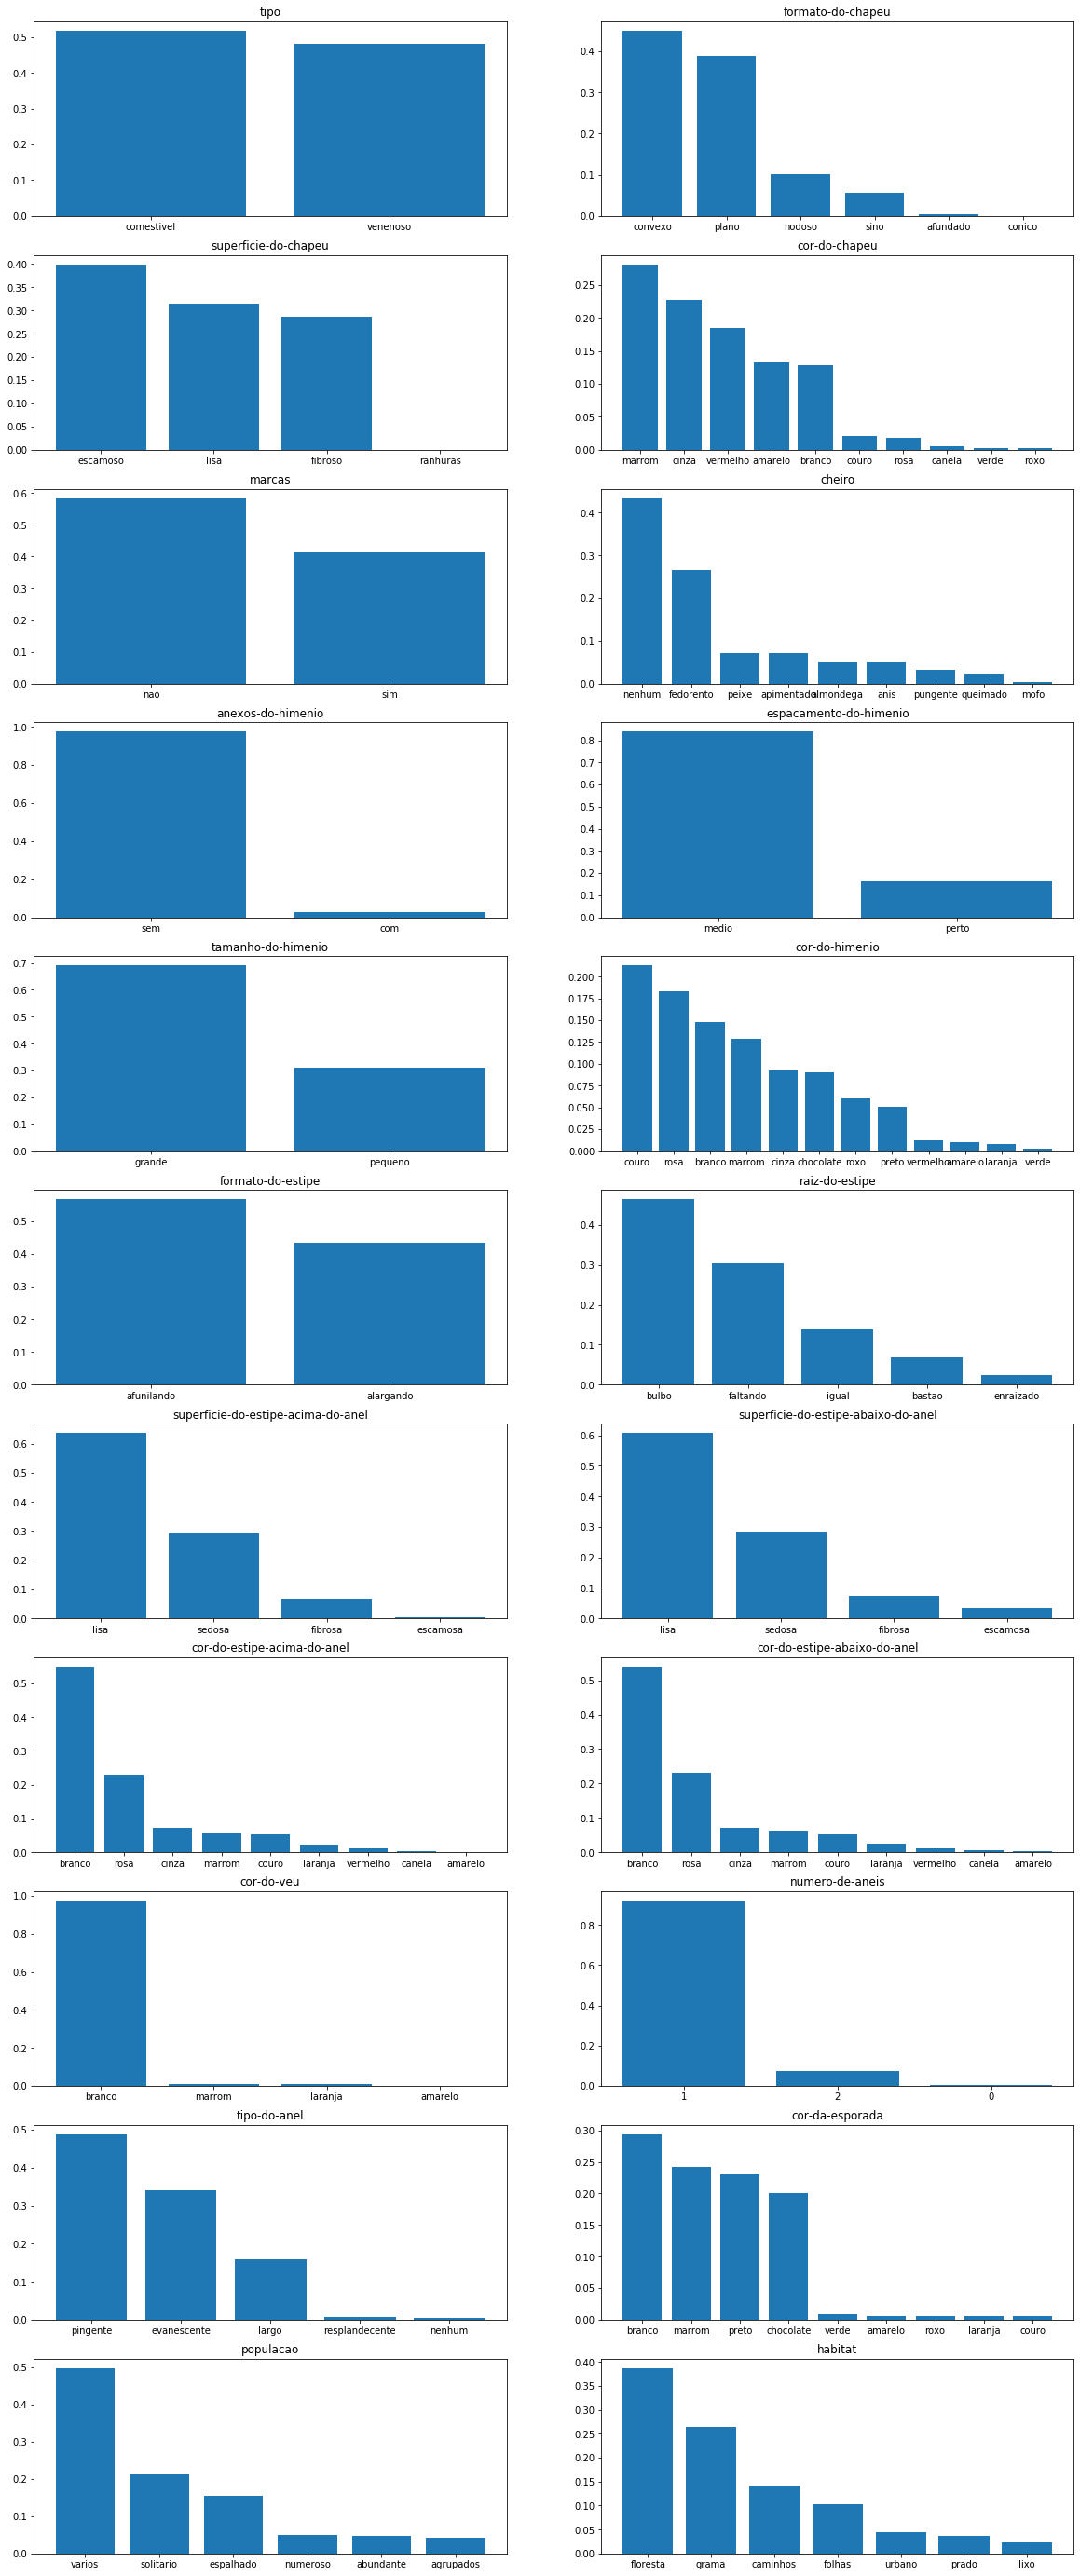

In [7]:
i = 0 #posição do subplot
f = plt.figure(figsize=(20, 50)) #tamanho do subplot
for coluna in data_clean:
    i += 1
    plot = f.add_subplot(11, 2, i)
    plot.bar(data_clean[coluna].value_counts().index,data_clean[coluna].value_counts(normalize=True))
    plt.title(coluna)
plt.show()


Com isso reparamos que a distribuição entre cogumelos venenosos e comestiveis muito proxima, o que vai nos ajudar nas proximas etapas do trabalho pois esta bem equilibrado. Tambem reparamos que dentro de uma dominio, existem algumas caracteristicas que dominam como por exemplo a grande maioria dos cogumelos possuem anexos do himenio.
Vamos observar a distribuição entre cogumelos venenosos e comestiveis mais claramente:


In [8]:
data_clean['tipo'].value_counts(normalize=True)

comestivel    0.517971
venenoso      0.482029
Name: tipo, dtype: float64

Assim, sabemos que nosso modelo previsivel deve ter uma taxa de acerto maior que 52%, ja que caso foi menor que isso, nosso modelo pode ser descartado.

Vamos invetigar agora a porcentagem de cogumelos venenosos e comestiveis por característica:

D:\comp\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


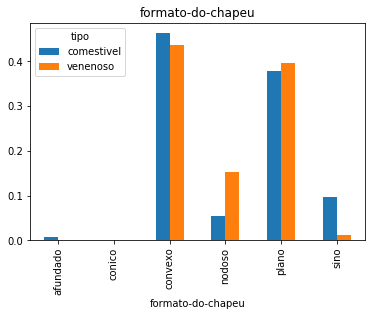

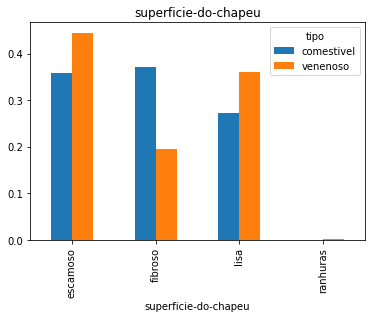

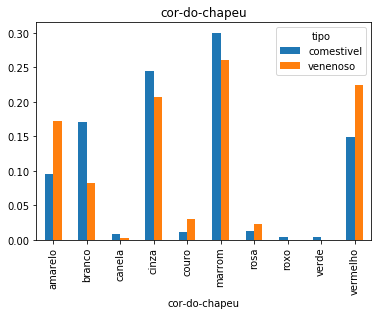

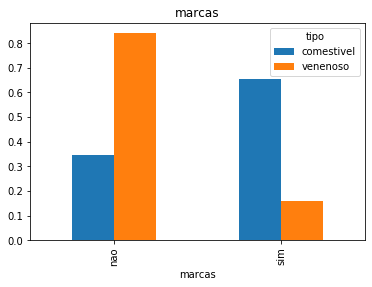

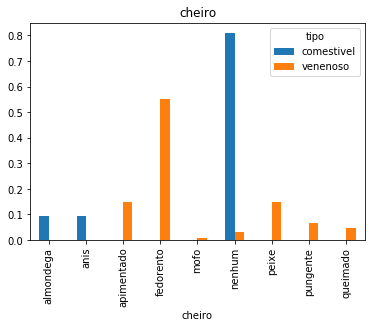

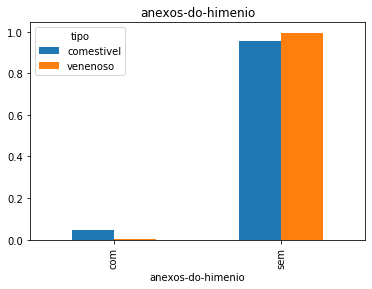

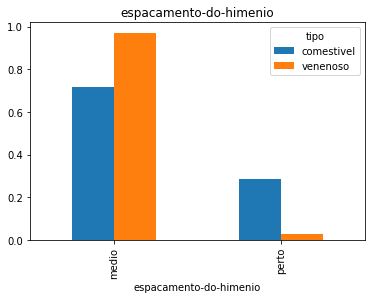

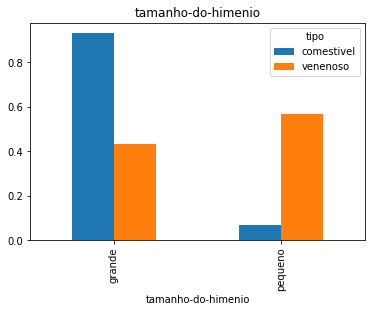

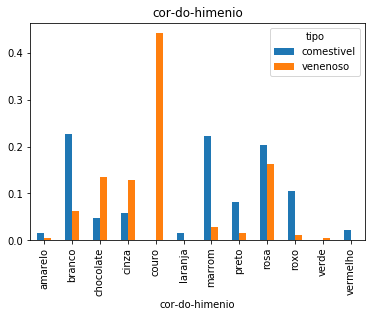

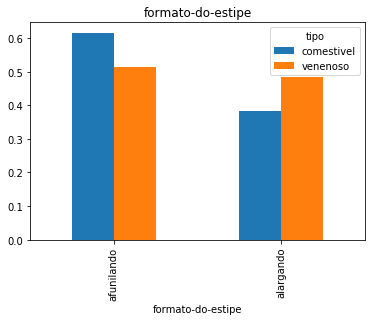

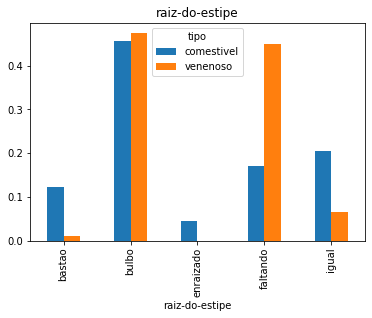

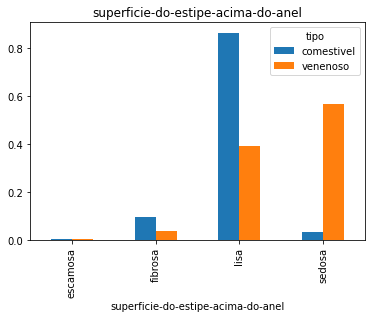

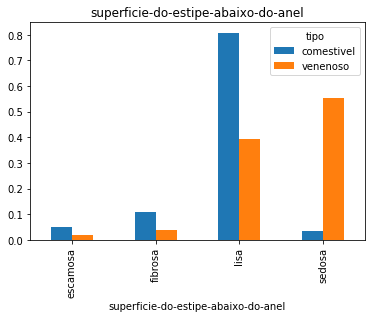

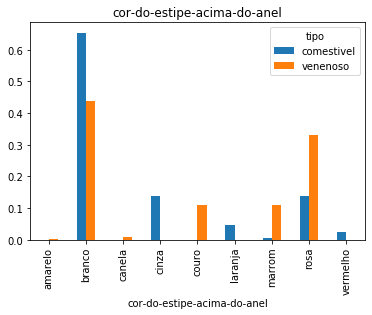

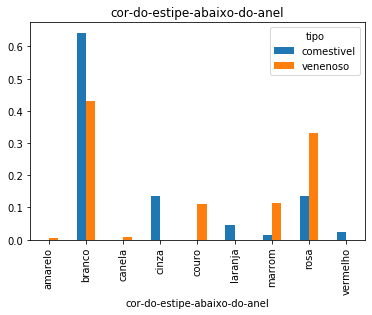

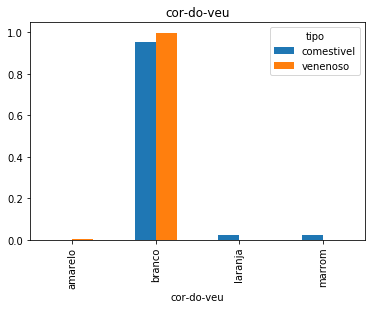

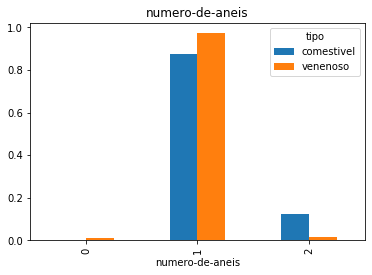

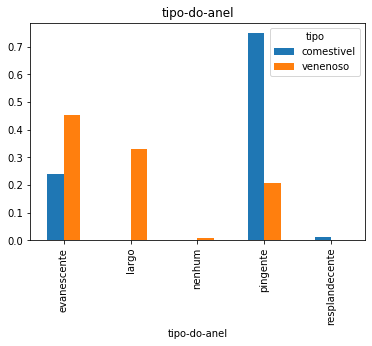

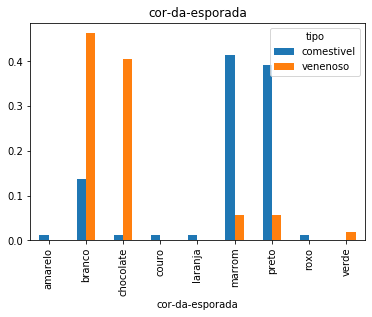

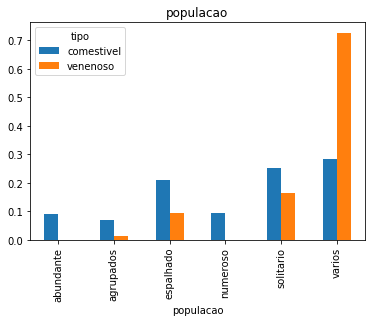

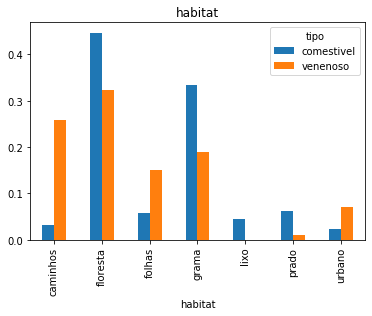

In [9]:
for coluna in data_clean.drop(columns=['tipo']):
    pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo'], normalize='columns').plot.bar()
    plt.title(coluna)
plt.show()

Concluimos a partir desses graficos que existem várias características diretamente relacionadas ao tipo de cogumelo. Chama expecial atenção o cheiro: se o cogumelo tiver algum cheiro, é possivel identificar se ele é venenoso a partir apenas dessa característica

Para criar nosso modelo, decidimos por fazer uma regressao logistica. Assim precisamos transformar todas nossas variaveis que sao qualitativas em quantitativas com ajuda da função get_dummies do pandas.

In [10]:
data_clean_dummies = pd.get_dummies(data_clean)

In [11]:
data_clean_dummies.head()

,tipo_comestivel,tipo_venenoso,formato-do-chapeu_afundado,formato-do-chapeu_conico,formato-do-chapeu_convexo,formato-do-chapeu_nodoso,formato-do-chapeu_plano,formato-do-chapeu_sino,superficie-do-chapeu_escamoso,superficie-do-chapeu_fibroso,...,populacao_numeroso,populacao_solitario,populacao_varios,habitat_caminhos,habitat_floresta,habitat_folhas,habitat_grama,habitat_lixo,habitat_prado,habitat_urbano
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Como nossas variaveis ja estao no formato quantitavo para poder implementar nosso modelo, separamos nossos dados em 2 datasets com o intuito de usar um deles para treinar nosso modelo e outro para verificar a proeficiencia do nosso modelo.

In [12]:
razao = 0.6 #razao é o tamanho do treino, 1-razao é o tamanho do teste
corte = int(razao*data_clean_dummies.shape[0])
data_treino = data_clean_dummies.iloc[:corte,:]
data_teste = data_clean_dummies.iloc[corte:,:]

In [13]:
X_treino = data_treino.drop(columns=["tipo_comestivel", "tipo_venenoso"])
y_treino = data_treino['tipo_comestivel']
X_teste = data_teste.drop(columns=["tipo_comestivel", "tipo_venenoso"])
y_teste = data_teste['tipo_comestivel']

Desta forma, decidimos implementar 3 classificadores diferentes para analizar suas respostas, sendo eles o Random Forest, a regressao logistica e o Naive Bayes.

Optamos pelo Random Forest por ser um algoritmo relativamente simples de configurar, porem apresenta valores interessantes.
Esse nome surge pelo fato que o algorimo é um conjunto de arvores de decisao, com cada uma relativamente diferente do outro, e assim dada uma variavel independente a ele, as arvores de decisao vao retornar um valor a essa variavel (que no nosso caso seria comestivel = 1 e venenoso = 0). Assim o valor retornado da maioria das arvores seria o do nosso modelo.
As arvores de decisao funcionam separando regioes no grafico entre a variavel dependente e independente, e assim as regioes que 

A regressao logistica seria a construção de uma função logistica que separaria os valores do grafico entre a variavel dependente e indepentente para prever o resultado do modelo (no nosso caso comestivel ou venenoso) pela posição do ponto no grafico. Assim ela é identica a uma regressao linear, mudando apenas o formato da função.

O Naive Bayes calcula caracterisitca por caracteristica para saber sua porcenntagem dela ser comestivel ou venenoso, assim apos fazer a multiplicação de todos esses valores para todas as caracterisitcas, ele nos informa qual classificação o nosso cogumelo tem mais chance de ser (no nosso caso venenoso ou comestivel). 

In [14]:
metodos = [ensemble.RandomForestClassifier(n_estimators=100), linear_model.LogisticRegression(), naive_bayes.GaussianNB()]

for i in metodos:

    model = i
    model.fit(X_treino, y_treino)

    ypred = model.predict(X_teste)

    resultado = pd.crosstab(ypred, y_teste, rownames=['predição:'], colnames=['é comestivel:'])
    acertos = resultado[0][0] + resultado[1][1]
    erros = resultado[0][1] + resultado[1][0]
    porcentagem = acertos/(acertos + erros)*100
    
    print('>>> ' + repr(i) + ':\n')
    print(f"acertos: {acertos} // erros: {erros} // %: {porcentagem}")
    display(resultado)

>>> RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):

acertos: 3164 // erros: 86 // %: 97.35384615384616


é comestivel:,0,1
predição:,,
0,2459,78
1,8,705


D:\comp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


>>> LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):

acertos: 3131 // erros: 119 // %: 96.33846153846154


é comestivel:,0,1
predição:,,
0,2447,99
1,20,684


>>> GaussianNB(priors=None, var_smoothing=1e-09):

acertos: 2913 // erros: 337 // %: 89.63076923076923


é comestivel:,0,1
predição:,,
0,2416,286
1,51,497


Pelos resultados, todos os nossos modelos superaram seu benchmark (a porcentagem de cogumelos comestiveis na base de dados, 51.8%)

Todos os erros dos modelos tiveram peso maior nos falsos negativos, que no nosso caso é um motivo bom pois mais vale a classificação de um cogumelo como venenoso sendo ele comestivel do que ao contrario, pois isso poderia colocar em risco de morte.

Sendo de todos eles o melhor o Random Forest, porem seu grande problema é que por ser randomico, assim sua acuracia varia a cada teste, e nao conseguimos interpretar o modelo de decisao do algoritimo para entender seu funcionamento

Em Segundo Lugar foi a Regressao logistia, com aproximadamente 96% de acuracia. Apesar de nao ser o melhor, trouxe resultados bem proximos e sua vantagem é que podemos entender como o algoritmo esta classificando para possiveis melhoras caso precisamos ser mais preciso.

Em terceiro lugar foi o Naive Bayes, com aproximadamente 89% de acuracia. Isso era esperado pois para o Naive Bayes chegar em resultados interessantes, é preciso ter uma base de dados de treinamento bastante ampla, que nao era nosso caso. 

Assim, o problema de nossos modelos é que todos eles tentam classificar os cogumelos, mesmo que o resultado nao seja muito preciso. Isso no noso caso pode resultar em uma morte por um falso positivo. 
Alem disso, nossos modelos precisam de um computador ou matematica relativamente avançada para a classificação de um cogumelo, coisa que seria melhor nao depender caso alguem precise comer um cogumelo ou nao.
Levando tudo isso em conta, pretendemos apresentar nosso ultimo modelo que tem o intuito de fazer uma arvore de decisao que tenha muita precisao para saber se é possivel comer um cogumelo ou nao. (tudo isso utilizando a nosso base de dados, assim ainda estamos sujeito a teoria do cisne negro)


Para isso, vamos separar novamente a quantidade de cogumelos de cada caracteristica, para saber quantos sao venenosos e comestiveis

In [15]:
for coluna in data_clean.drop(columns=['tipo']):
    display(pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']))


tipo,comestivel,venenoso
formato-do-chapeu,,
afundado,32,0
conico,0,4
convexo,1948,1708
nodoso,228,600
plano,1596,1556
sino,404,48


tipo,comestivel,venenoso
superficie-do-chapeu,,
escamoso,1504,1740
fibroso,1560,760
lisa,1144,1412
ranhuras,0,4


tipo,comestivel,venenoso
cor-do-chapeu,,
amarelo,400,672
branco,720,320
canela,32,12
cinza,1032,808
couro,48,120
marrom,1264,1020
rosa,56,88
roxo,16,0
verde,16,0


tipo,comestivel,venenoso
marcas,,
nao,1456,3292
sim,2752,624


tipo,comestivel,venenoso
cheiro,,
almondega,400,0
anis,400,0
apimentado,0,576
fedorento,0,2160
mofo,0,36
nenhum,3408,120
peixe,0,576
pungente,0,256
queimado,0,192


tipo,comestivel,venenoso
anexos-do-himenio,,
com,192,18
sem,4016,3898


tipo,comestivel,venenoso
espacamento-do-himenio,,
medio,3008,3804
perto,1200,112


tipo,comestivel,venenoso
tamanho-do-himenio,,
grande,3920,1692
pequeno,288,2224


tipo,comestivel,venenoso
cor-do-himenio,,
amarelo,64,22
branco,956,246
chocolate,204,528
cinza,248,504
couro,0,1728
laranja,64,0
marrom,936,112
preto,344,64
rosa,852,640


tipo,comestivel,venenoso
formato-do-estipe,,
afunilando,2592,2016
alargando,1616,1900


tipo,comestivel,venenoso
raiz-do-estipe,,
bastao,512,44
bulbo,1920,1856
enraizado,192,0
faltando,720,1760
igual,864,256


tipo,comestivel,venenoso
superficie-do-estipe-acima-do-anel,,
escamosa,16,8
fibrosa,408,144
lisa,3640,1536
sedosa,144,2228


tipo,comestivel,venenoso
superficie-do-estipe-abaixo-do-anel,,
escamosa,208,76
fibrosa,456,144
lisa,3400,1536
sedosa,144,2160


tipo,comestivel,venenoso
cor-do-estipe-acima-do-anel,,
amarelo,0,8
branco,2752,1712
canela,0,36
cinza,576,0
couro,0,432
laranja,192,0
marrom,16,432
rosa,576,1296
vermelho,96,0


tipo,comestivel,venenoso
cor-do-estipe-abaixo-do-anel,,
amarelo,0,24
branco,2704,1680
canela,0,36
cinza,576,0
couro,0,432
laranja,192,0
marrom,64,448
rosa,576,1296
vermelho,96,0


tipo,comestivel,venenoso
cor-do-veu,,
amarelo,0,8
branco,4016,3908
laranja,96,0
marrom,96,0


tipo,comestivel,venenoso
numero-de-aneis,,
0,0,36
1,3680,3808
2,528,72


tipo,comestivel,venenoso
tipo-do-anel,,
evanescente,1008,1768
largo,0,1296
nenhum,0,36
pingente,3152,816
resplandecente,48,0


tipo,comestivel,venenoso
cor-da-esporada,,
amarelo,48,0
branco,576,1812
chocolate,48,1584
couro,48,0
laranja,48,0
marrom,1744,224
preto,1648,224
roxo,48,0
verde,0,72


tipo,comestivel,venenoso
populacao,,
abundante,384,0
agrupados,288,52
espalhado,880,368
numeroso,400,0
solitario,1064,648
varios,1192,2848


tipo,comestivel,venenoso
habitat,,
caminhos,136,1008
floresta,1880,1268
folhas,240,592
grama,1408,740
lixo,192,0
prado,256,36
urbano,96,272


Com isso, conseguimos observar que existem apenas cogumelos com um tipo para certas caracteristicas, como por exemplo, so existe cogumelos comestiveis para cogumelos com o chapeu afundado.
Assim conseguimos saber que se um novo cogumelo tiver o chapeu afundado, sua maior probabilidade é que ele seja comestivel.
Desta forma, consegumos montar uma lista de todas as caracterisitcas que caso um cogumelo tenho, torna sua probabilidade de ser comestivel muito alta ou ate mesmo venenoso.

In [21]:
confirma_venenoso = {}
confirma_comestivel = {}
for coluna in data_clean.drop(columns=['tipo']):
    for i in pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']).index:
        if pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']).loc[i,'comestivel'] == 0:
            confirma_venenoso.setdefault(coluna,[]).append(i)
        if pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']).loc[i,'venenoso'] == 0:
            confirma_comestivel.setdefault(coluna,[]).append(i)
print(confirma_venenoso)
print(confirma_comestivel)

{'formato-do-chapeu': ['conico'], 'superficie-do-chapeu': ['ranhuras'], 'cheiro': ['apimentado', 'fedorento', 'mofo', 'peixe', 'pungente', 'queimado'], 'cor-do-himenio': ['couro', 'verde'], 'cor-do-estipe-acima-do-anel': ['amarelo', 'canela', 'couro'], 'cor-do-estipe-abaixo-do-anel': ['amarelo', 'canela', 'couro'], 'cor-do-veu': ['amarelo'], 'numero-de-aneis': ['0'], 'tipo-do-anel': ['largo', 'nenhum'], 'cor-da-esporada': ['verde']}
{'formato-do-chapeu': ['afundado'], 'cor-do-chapeu': ['roxo', 'verde'], 'cheiro': ['almondega', 'anis'], 'cor-do-himenio': ['laranja', 'vermelho'], 'raiz-do-estipe': ['enraizado'], 'cor-do-estipe-acima-do-anel': ['cinza', 'laranja', 'vermelho'], 'cor-do-estipe-abaixo-do-anel': ['cinza', 'laranja', 'vermelho'], 'cor-do-veu': ['laranja', 'marrom'], 'tipo-do-anel': ['resplandecente'], 'cor-da-esporada': ['amarelo', 'couro', 'laranja', 'roxo'], 'populacao': ['abundante', 'numeroso'], 'habitat': ['lixo']}


A partir dessas duas listas, podemos montar um modelo facil de entender que qualquer um poderia usar caso encontre um cogumelo, ja que basta comparar as caracteristicas desse cogumelo com das listas para saber se ele é comestivel ou nao.
Agora vamos ao teste desse modelo para ver sua performance

In [31]:
esperado = data_clean.iloc[:,0]
erros = []
conta = [0,0] 
for i in data_clean.index:
    result = ''
    for linha,coluna in zip(data_clean.drop(columns=['tipo']).iloc[i,:],data_clean.drop(columns=['tipo']).columns):
        if coluna in confirma_venenoso.keys():
            if linha in confirma_venenoso[coluna]:
                result = 'venenoso'
        if coluna in confirma_comestivel.keys():
            if linha in confirma_comestivel[coluna]:
                result = 'comestivel'
    if result == '':
        erros += [i]
    else:
        if result == esperado[i]:
            conta[0] += 1
        else:
            conta[1] += 1
comestiveis_perdidos = 0
for i in erros:
    if data_clean.iloc[i,0] == 'comestivel':
        comestiveis_perdidos += 1

print(f'acertos: {conta[0]} // erros : {conta[1]} // nao conseguiu: {len(erros)} [{"{:.2f}".format(100*len(erros)/data_clean.shape[0])}%] // cogumelos comestiveis perdidos : {comestiveis_perdidos} [{"{:.2f}".format(100*comestiveis_perdidos/len(erros))}%]')

acertos: 6649 // erros : 0 // nao conseguiu: 1475 [18.16%] // cogumelos comestiveis perdidos : 1456 [98.71%]


Pelo resultado, percebemos que ele nao consegue classificar cerca de 18% dos cogumelos, porem como podemos observar, a grande maioria dos cogumelos que ele nao classifica sao comestiveis (98%), assim podemos ate assumir que caso um cogumelo nao entre em nenhuma das listas, é possivel assumir que ele é comestivel.

In [37]:
esperado = data_clean.iloc[:,0]
erros = []
conta = [0,0] 
for i in data_clean.index:
    result = ''
    for linha,coluna in zip(data_clean.drop(columns=['tipo']).iloc[i,:],data_clean.drop(columns=['tipo']).columns):
        if coluna in confirma_venenoso.keys():
            if linha in confirma_venenoso[coluna]:
                result = 'venenoso'
    if result == '':
        result = 'comestivel'
    if result == esperado[i]:
        conta[0] += 1
    else:
        conta[1] += 1

print(f'acertos: {conta[0]} // erros : {conta[1]} [{"{:.2f}".format(100*conta[1]/data_clean.shape[0])}%]')

acertos: 8105 // erros : 19 [0.23%]


Assim, conseguimos ver que o erro é bem pequeno do nosso modelo (0,23%) e como, na pratica, nao temos certeza se essas caracteristicas de fato confirmam se um cogumelo é venenoso ou nao, podendo sempre estar sugeito a teoria do cisne negro. Concluimos que esse modelo seria o mais preciso que poderiamos chegar, sendo bem mais intuitivo que os outros utilizados anteriormente. Assim, para saber se é possivel consumir um cogumelo, é so comparar suas caracteristicas com a da lista a seguir, e caso ele tenha alguma caracteristica, a probabilidade dele ser venenoso é alta. 

In [38]:
confirma_venenoso

{'formato-do-chapeu': ['conico'],
 'superficie-do-chapeu': ['ranhuras'],
 'cheiro': ['apimentado',
  'fedorento',
  'mofo',
  'peixe',
  'pungente',
  'queimado'],
 'cor-do-himenio': ['couro', 'verde'],
 'cor-do-estipe-acima-do-anel': ['amarelo', 'canela', 'couro'],
 'cor-do-estipe-abaixo-do-anel': ['amarelo', 'canela', 'couro'],
 'cor-do-veu': ['amarelo'],
 'numero-de-aneis': ['0'],
 'tipo-do-anel': ['largo', 'nenhum'],
 'cor-da-esporada': ['verde']}